In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

df = pd.read_csv('/kaggle/input/how-much-sleep-do-americans-really-get/Time Americans Spend Sleeping.csv')


In [2]:
df.head()

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


We have 9 columns nad 945 rows. First we check for unneccesary data. We print the columns and its values to see how many different values we have in the column and if they offer any information at all. 

In [3]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('------------------------------------')

index
0      1
635    1
623    1
624    1
625    1
      ..
319    1
320    1
321    1
322    1
944    1
Name: index, Length: 945, dtype: int64
------------------------------------
Year
2003    63
2004    63
2005    63
2006    63
2007    63
2008    63
2009    63
2010    63
2011    63
2012    63
2013    63
2014    63
2015    63
2016    63
2017    63
Name: Year, dtype: int64
------------------------------------
Period
Annual    945
Name: Period, dtype: int64
------------------------------------
Avg hrs per day sleeping
9.34    14
8.36    13
8.93    10
8.91    10
8.97    10
        ..
7.88     1
7.76     1
7.83     1
7.72     1
7.90     1
Name: Avg hrs per day sleeping, Length: 221, dtype: int64
------------------------------------
Standard Error
0.072    17
0.092    16
0.077    16
0.101    15
0.086    14
         ..
0.214     1
0.159     1
0.177     1
0.025     1
0.145     1
Name: Standard Error, Length: 158, dtype: int64
------------------------------------
Type of Days
All days        

We can see that the column 'Activity' has only one value: Sleeping. Since we already know that sleeping is the activity that database is about, we can remove this column as it offers no additional information. 

The same can be said about the 'Period' column. It only contains one value: Annual. Now that we know we are measuring annual period of sleeping, we can also drop this column. 

Index can also be dropped since we won't be looking at individuals, but rather at whole groups/subgroups. We will also drop standard error as it gives very little useful information. 

Since the column name for the avg hrs per day sleeping is unnecceseraly long, we will shorten it to 'Avg_sleep'. 

In [4]:
df = df[['Year', 'Avg hrs per day sleeping', 'Type of Days', 'Age Group', 'Sex']]
df.rename(columns = {'Avg hrs per day sleeping' : 'Avg_sleep'}, inplace = True)

If we look at the data more closely, we can see that we have annual information from year 2003-2017 for all sexes, types of days, age groups and avg sleeping time per day. The first thing we can look at is the difference between sexes and their average time spent sleeping.

Now we can start comparing data. We can begin by searching for any meaningful differences between men and women. 

In [5]:
df.groupby('Sex').agg({'Avg_sleep' : 'mean'})

,Avg_sleep
Sex,
Both,8.807841
Men,8.731587
Women,8.881175


We can see that there aren't many. On average across all days and age groups, women tend to sleep 10 minutes more per night than men. Now that we've seen that there are no meaningful differences between sexes, we can turn to other categories.

We can start with age groups. Common sense and experience will tell us that younger people on average tend to sleep more than older people. This could be due to many reasons, one of them being simply that younger people need more sleep, especially under 24 years of age, because they are still developing. 


Let's inspect the Age group column. First we check what kind of groups we have and how many values of that group.

In [6]:
df['Age Group'].value_counts()

15 years and over    135
15 to 24 years       135
25 to 34 years       135
35 to 44 years       135
45 to 54 years       135
55 to 64 years       135
65 years and over    135
Name: Age Group, dtype: int64

There appears to be 1 group which seems to be out of place. 15 years and over is already represented by every other group. Because we have no clue which ages are actually present in this group, we don't know how they will affect the rest of our analysis. So it's best that we get rid of it, if we want to find differences between meaningful groups.


In [7]:
df = df[df['Age Group'] != '15 years and over']

Let's see if there are any differences between age groups.

<AxesSubplot:xlabel='Age Group'>

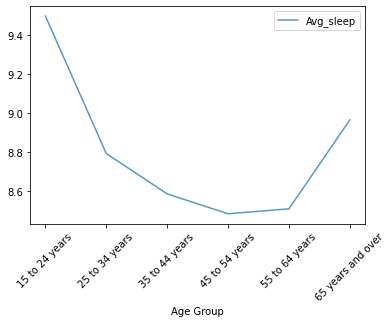

In [8]:
data = df.groupby('Age Group').agg({'Avg_sleep' : 'mean'})

data.plot(rot = 45, alpha = 0.75)

As We can see, there clearly are. Younger people tend to sleep more. The biggest difference is between age group 15 to 24 years and 45-54 years. The former on average sleep 1 hour more than the latter. Now let's check if different age groups sleep more or less on different type of a days. 


In [9]:
df.groupby(['Age Group', 'Type of Days']).agg({'Avg_sleep' : 'mean'})

Avg_sleep
Age Group         Type of Days                        
15 to 24 years    All days                    9.348222
                  Nonholiday weekdays         9.013556
                  Weekend days and holidays  10.136000
25 to 34 years    All days                    8.636889
                  Nonholiday weekdays         8.291778
                  Weekend days and holidays   9.450667
35 to 44 years    All days                    8.432444
                  Nonholiday weekdays         8.093111
                  Weekend days and holidays   9.233111
45 to 54 years    All days                    8.337333
                  Nonholiday weekdays         8.012222
                  Weekend days and holidays   9.102667
55 to 64 years    All days                    8.405333
                  Nonholiday weekdays         8.178444
                  Weekend days and holidays   8.944000
65 years and over All days                    8.925556
                  Nonholiday weekdays         8.837778
                  Weekend days and holidays   9.134222

The most stark difference is in the younger people. Given the chance, young people tend to sleep even more. Every generation seems to take a bit more time to sleep on off days, except people who are 65 years and more, probably because every day is off day when you are retired. We can also visualize this, so the differences are better seen. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '15 to 24 years'),
  Text(1, 0, '25 to 34 years'),
  Text(2, 0, '35 to 44 years'),
  Text(3, 0, '45 to 54 years'),
  Text(4, 0, '55 to 64 years'),
  Text(5, 0, '65 years and over')])

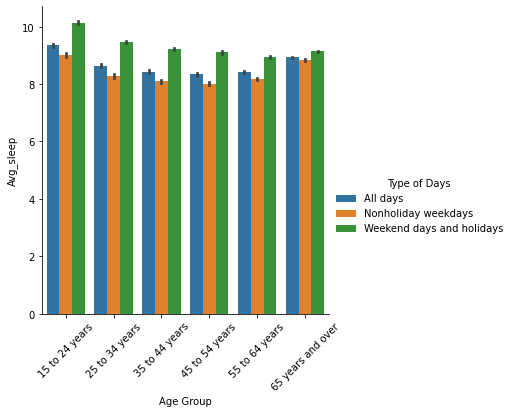

In [10]:
sns.catplot(kind = 'bar', data = df, x = 'Age Group', y = 'Avg_sleep', hue = 'Type of Days')
plt.xticks(rotation=45)


The last thing that we can analyze is how our sleeping patters changed over the last decade. If we check for any differences between between all ages, sexes and type of days, we can see that the average has been slowly increasing. 

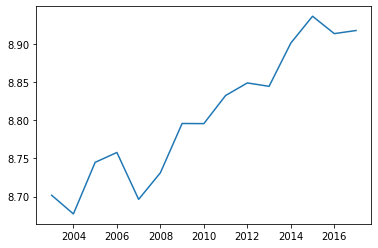

In [11]:
df.groupby(['Year']).agg({'Avg_sleep' : 'mean'})
plt.plot(df.groupby('Year')['Avg_sleep'].mean())

We can see that on average the time spent sleeping has increased about 12 minutes. This may not seem like a lot, but if we take into an account that his figure has been slowly rising over the years, a clear trend is indicated. Now let's dive into our data to see where the changes in sleep have been most prominent. 

In [12]:
df.groupby(['Year', 'Sex']).agg({'Avg_sleep' : 'mean'})

Avg_sleep
Year Sex             
2003 Both    8.702222
     Men     8.625556
     Women   8.777222
2004 Both    8.677778
     Men     8.623333
     Women   8.730556
2005 Both    8.745000
     Men     8.662778
     Women   8.826667
2006 Both    8.756667
     Men     8.706111
     Women   8.810556
2007 Both    8.697222
     Men     8.656667
     Women   8.735000
2008 Both    8.731111
     Men     8.692222
     Women   8.770000
2009 Both    8.797222
     Men     8.750000
     Women   8.840000
2010 Both    8.796111
     Men     8.708889
     Women   8.881667
2011 Both    8.833889
     Men     8.752222
     Women   8.911111
2012 Both    8.850000
     Men     8.725556
     Women   8.971111
2013 Both    8.845556
     Men     8.767222
     Women   8.920556
2014 Both    8.902778
     Men     8.785000
     Women   9.015556
2015 Both    8.937222
     Men     8.868889
     Women   9.002778
2016 Both    8.915556
     Men     8.827778
     Women   8.997222
2017 Both    8.919444
     Men     8.813889
     Women   9.019444

Data indicates that over the years the average sleeping time on all type of days has increased for women almost twice as much as it did for men. If we compare the earliest data and latest data for men and women, the average time for men has increased about 11 minutes, while for women 19 minutes.
Visualizing it, we can see the average slowly rising. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017')])

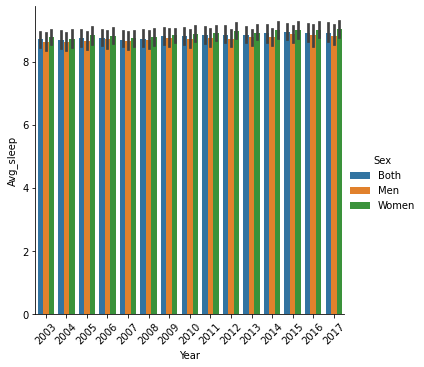

In [13]:
sns.catplot(kind = 'bar', data = df, x = 'Year', y = 'Avg_sleep', hue = 'Sex')
plt.xticks(rotation=45)

Let'see what differences lie in age groups. 

First we'll create a separate dataset to isolate the data we're looking for. 

In [14]:
data = df.groupby(['Age Group', 'Year']).agg({'Avg_sleep' : 'mean'})

We reset the index, so it'll be easier for us to go through the data with a for loop. 

In [15]:
data = data.reset_index()

We gather all the groups we are going to analyze.

In [16]:
age_groups = data['Age Group'].unique()

Let's first visualize the data, to see if the trend of average sleep is increasing of the years in age groups as well. 

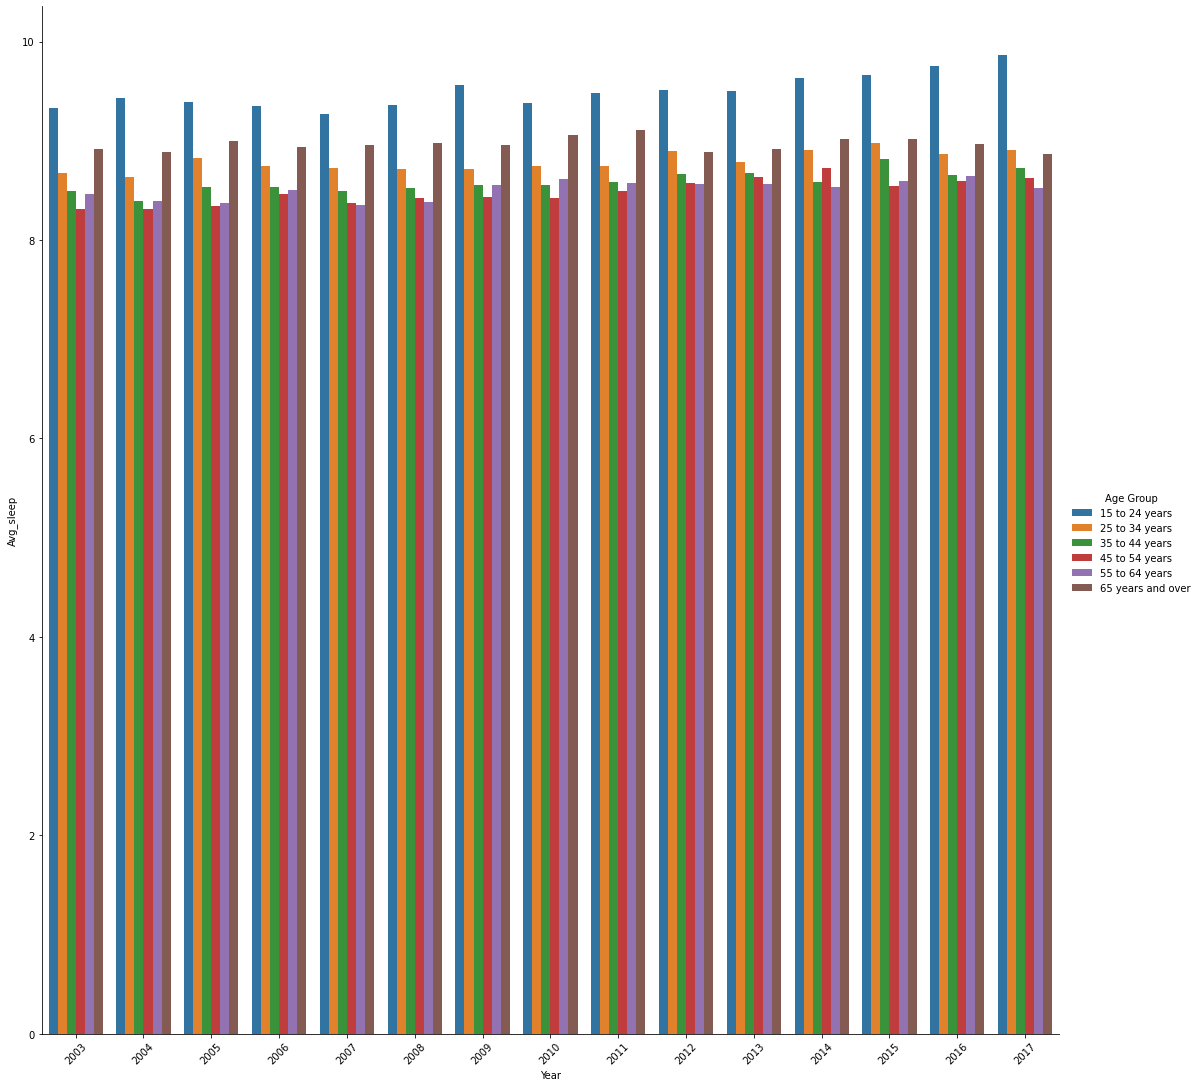

In [17]:
sns.catplot(kind = 'bar', data = data, x = 'Year', y = 'Avg_sleep', hue = 'Age Group', height = 15)
plt.xticks(rotation=45)
plt.show()

There are some trends that are discernible from the graph, but it's best if we look at age groups separately to see a clearer picture.

Then we go through all the data with a for loop, calculating the difference between the year 2003 and the year 2017 to see what kind of the difference we have. 

For generation 15 to 24 years, the difference in sleep was 31.59999999999993 minutes
For generation 25 to 34 years, the difference in sleep was 13.800000000000026 minutes
For generation 35 to 44 years, the difference in sleep was 13.399999999999963 minutes
For generation 45 to 54 years, the difference in sleep was 18.400000000000105 minutes
For generation 55 to 64 years, the difference in sleep was 3.60000000000003 minutes
For generation 65 years and over, the difference in sleep was -3.066666666666613 minutes


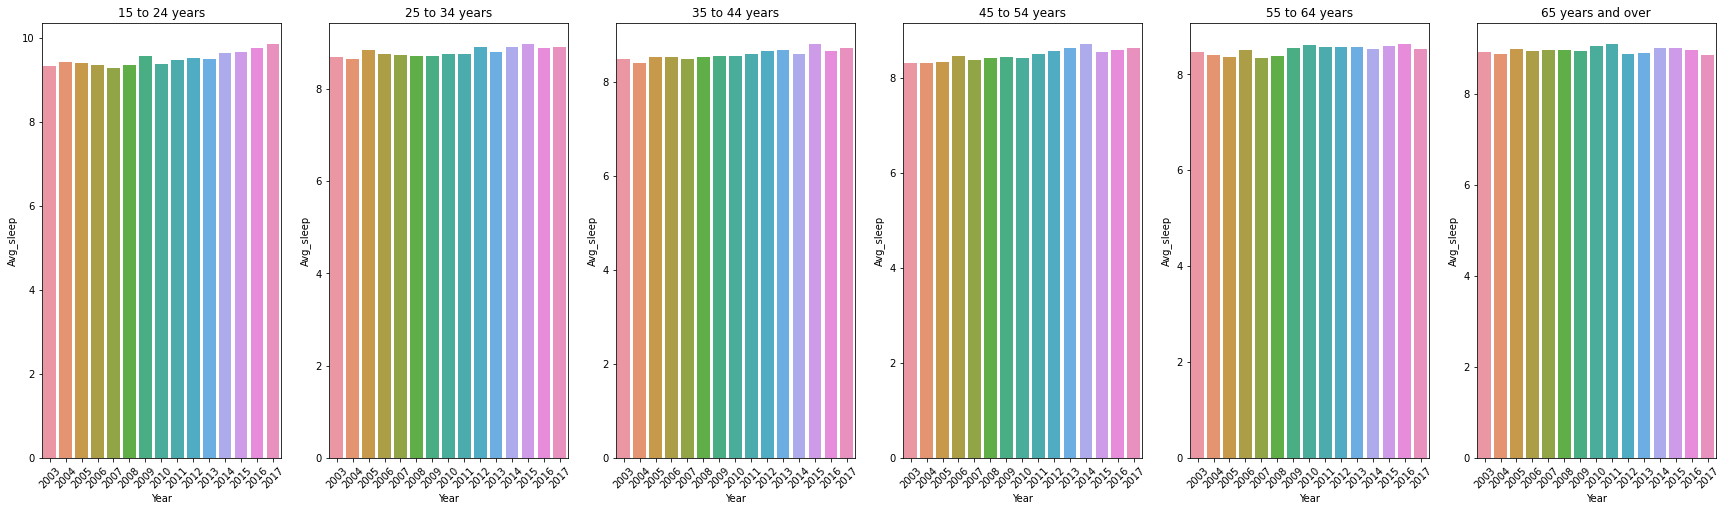

In [18]:
fig, axes = plt.subplots(1,6, sharex=True, figsize=(30,8))
for age in range(len(age_groups)):
    age_group = data[data['Age Group'] == age_groups[age]]
    sns.barplot(ax=axes[age], x=age_group['Year'], y=age_group['Avg_sleep'])
    axes[age].set_title(age_groups[age])
    axes[age].tick_params(axis='x', rotation=45)
    
    sleep = list(age_group['Avg_sleep'])
    sleep_difference = 60*(sleep[-1] - sleep[0])
    
    print('For generation {0}, the difference in sleep was {1} minutes'.format(age_groups[age],sleep_difference)) 


For our model, we will use random forest regressor.

First we categorize the data and select our target and feature variables.


In [19]:
df['Age'] = df['Age Group'].factorize()[0]
df['S'] = df.Sex.factorize()[0]
df['Day'] = df['Type of Days'].factorize()[0]
df.head()

,Year,Avg_sleep,Type of Days,Age Group,Sex,Age,S,Day
45,2003,9.15,All days,15 to 24 years,Both,0,0,0
46,2004,9.23,All days,15 to 24 years,Both,0,0,0
47,2005,9.27,All days,15 to 24 years,Both,0,0,0
48,2006,9.19,All days,15 to 24 years,Both,0,0,0
49,2007,9.11,All days,15 to 24 years,Both,0,0,0


In [20]:
features = ['Year', 'Age', 'S', 'Day']
target = ['Avg_sleep']
X = df[['Year','Age', 'S', 'Day']]
y = df['Avg_sleep']

Then, we train the model and evaluate our predictions. 

In [21]:
df_model = RandomForestRegressor(random_state = 1)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

df_model.fit(train_X, train_y)

df_predict = df_model.predict(test_X)

df_mae = mean_absolute_error(df_predict, test_y)

print(df_mae)

0.07758768472906379


We can now save the model and test it's accuracy on all of our data. 

In [22]:
filename= 'final_model'
pickle.dump(df_model, open(filename, 'wb'))


loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_X, test_y)
print(result)


0.965932505326587
